# **Data Processing and Data Exploration**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing and Converting Files

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import math

In [ ]:
ratings_dat_file = '/content/drive/MyDrive/ml-1m/ml-1m/ratings.dat'
csv_output_file = '/content/drive/MyDrive/ml-1m/ml-1m/ratings.csv'
column_names = ['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings_df = pd.read_csv(ratings_dat_file, sep='::', engine='python', header=None, names=column_names)
ratings_df.to_csv(csv_output_file, index=False)
print(f'Conversion completed. CSV file saved as {csv_output_file}')

Conversion completed. CSV file saved as /content/drive/MyDrive/ml-1m/ml-1m/ratings.csv


In [ ]:
users_dat_file = '/content/drive/MyDrive/ml-1m/ml-1m/users.dat'
csv_output_file = '/content/drive/MyDrive/ml-1m/ml-1m/users.csv'
column_names = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users_df = pd.read_csv(users_dat_file, sep='::', engine='python', header=None, names=column_names)
users_df.to_csv(csv_output_file, index=False)
print(f'Conversion completed. CSV file saved as {csv_output_file}')

Conversion completed. CSV file saved as /content/drive/MyDrive/ml-1m/ml-1m/users.csv


In [ ]:
movies_dat_file = '/content/drive/MyDrive/ml-1m/ml-1m/movies.dat'
csv_output_file = '/content/drive/MyDrive/ml-1m/ml-1m/movies.csv'
column_names = ['MovieID', 'Title', 'Genres']
movies_df = pd.read_csv(movies_dat_file, sep='::', engine='python', header=None, names=column_names, encoding='latin1')
movies_df.to_csv(csv_output_file, index=False)
print(f'Conversion completed. CSV file saved as {csv_output_file}')

Conversion completed. CSV file saved as /content/drive/MyDrive/ml-1m/ml-1m/movies.csv


### Movies Data

In [ ]:
movies_data=pd.read_csv('/content/drive/MyDrive/ml-1m/ml-1m/movies.csv')
movies_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies_data['Year'] = movies_data['Title'].str.extract(r'\((\d{4})\)')
movies_data['Title'] = movies_data['Title'].str.replace(r'(\(\d{4}\))', '', regex=True).str.strip()

movies_data.head()

,MovieID,Title,Genres,Year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
 3   Year     3883 non-null   object
dtypes: int64(1), object(3)
memory usage: 121.5+ KB


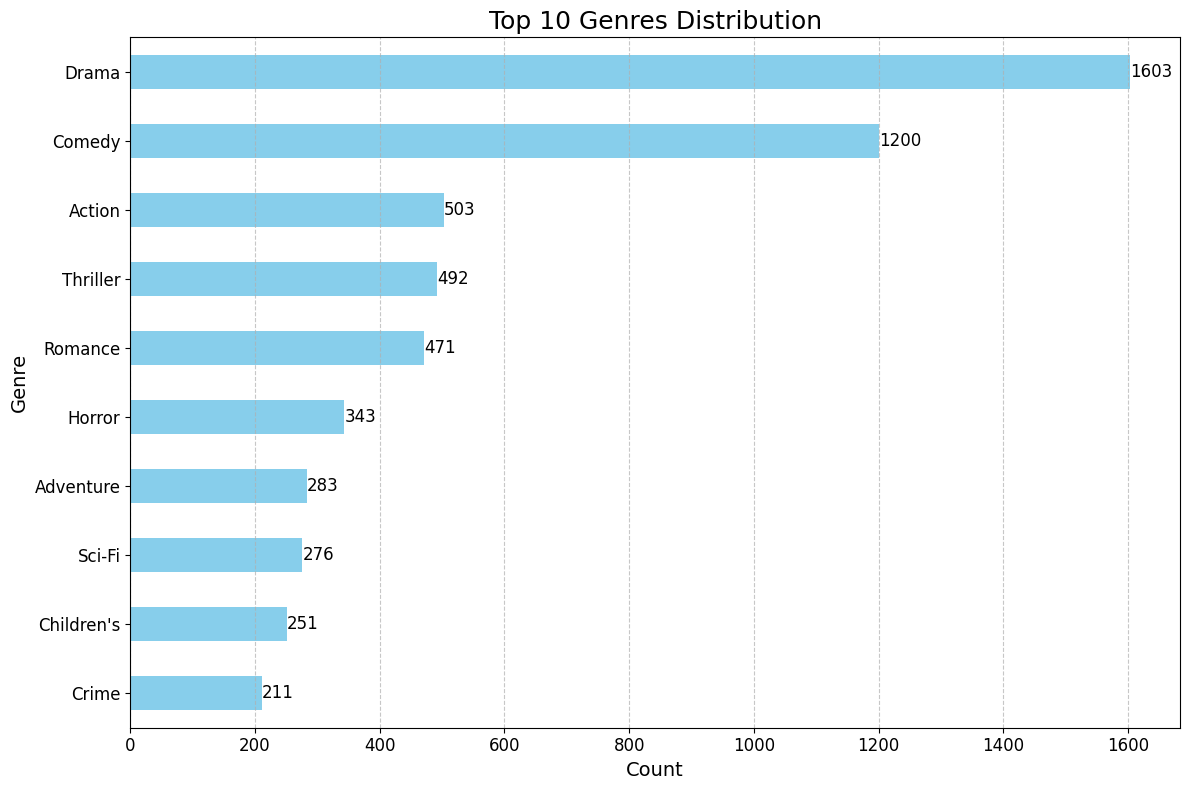

In [ ]:
genres_split = movies_data['Genres'].str.split('|').explode()
top_genres_counts = genres_split.value_counts().head(10)
plt.figure(figsize=(12, 8))
top_genres_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Genres Distribution', fontsize=18)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(top_genres_counts.sort_values()):
    plt.text(value, index, str(value), fontsize=12, va='center')

plt.tight_layout()
plt.show()

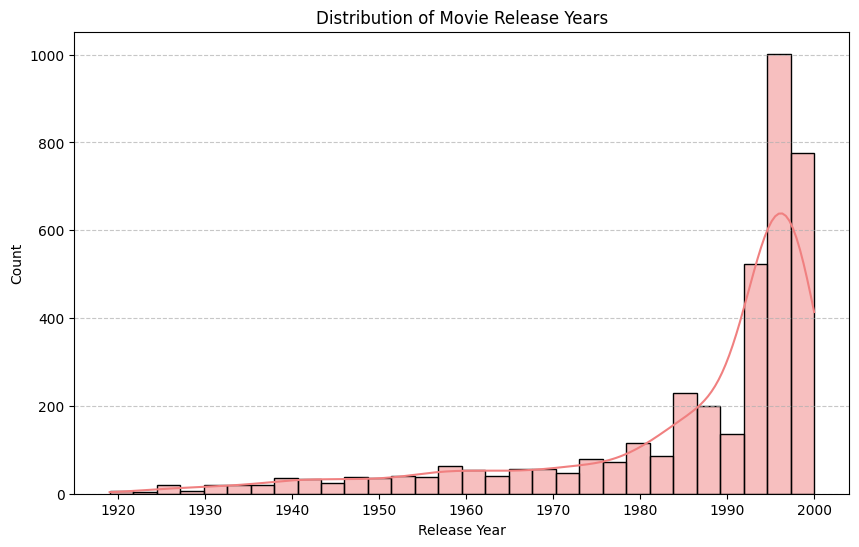

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(movies_data['Year'].dropna().astype(int), bins=30, kde=True, color='lightcoral')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Users Data

In [ ]:
users_data=pd.read_csv('/content/drive/MyDrive/ml-1m/ml-1m/users.csv')
users_data.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


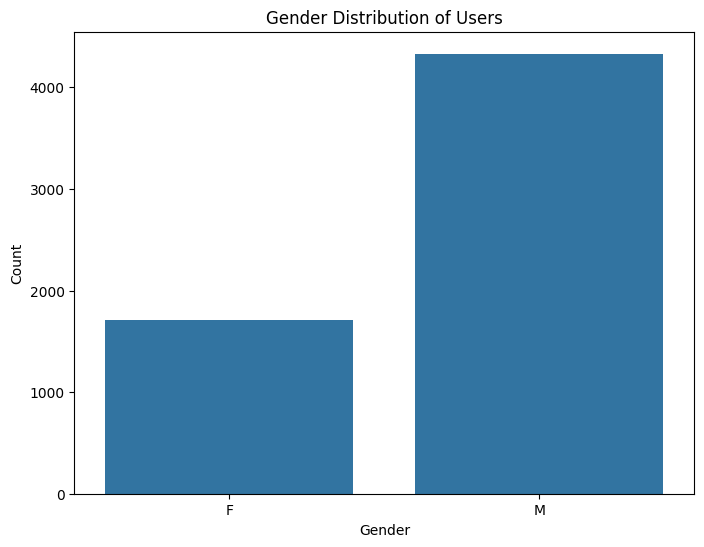

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=users_data)
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
occupation_mapping = { 0: "Other or not specified", 1: "Academic/Educator", 2: "Artist", 3: "Clerical/Admin", 4: "College/Grad Student", 5: "Customer Service", 6: "Doctor/Health care", 7: "Executive/Managerial", 8: "Farmer", 9: "Homemaker", 10: "K-12 Student", 11: "Lawyer", 12: "Programmer", 13: "Retired", 14: "Sales/Marketing", 15: "Scientist", 16: "Self-Employed", 17: "Technician/Engineer", 18: "Tradesman/Craftsman", 19: "Unemployed", 20: "Writer" }
users_data['Occupation_Name'] = users_data['Occupation'].map(occupation_mapping)

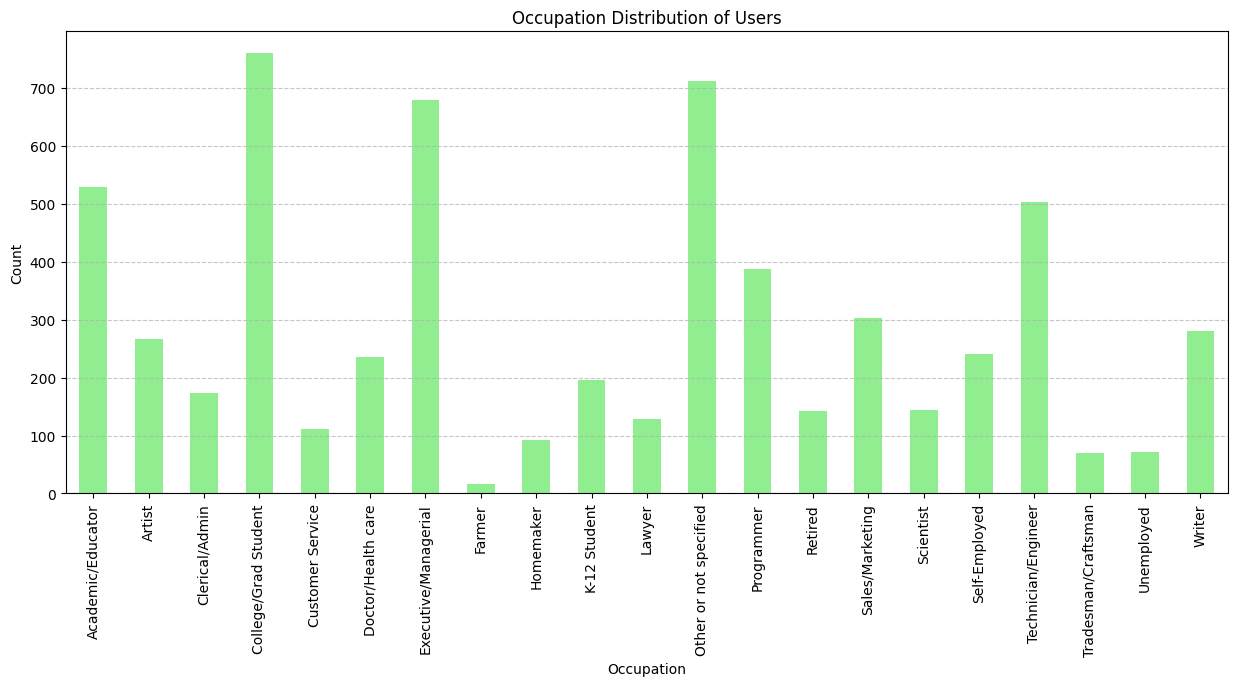

In [ ]:
occupation_counts = users_data['Occupation_Name'].value_counts().sort_index()
plt.figure(figsize=(15, 6))
occupation_counts.plot(kind='bar', color='lightgreen')
plt.title('Occupation Distribution of Users')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Ratings Data

In [ ]:
ratings_data=pd.read_csv('/content/drive/MyDrive/ml-1m/ml-1m/ratings.csv')
ratings_data.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


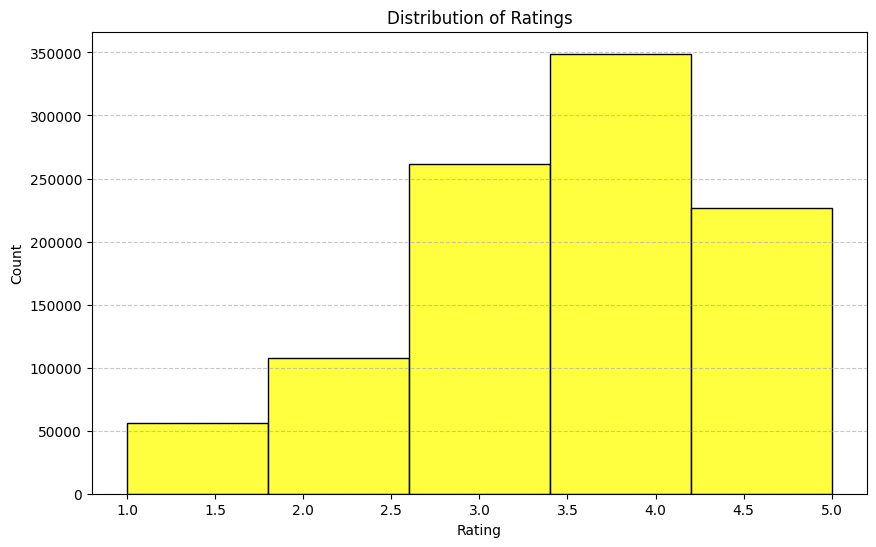

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(ratings_data['Rating'], bins=5, kde=False, color='yellow')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Creating User-Movie Ratings matrix

In [ ]:
merged_data = pd.merge(movies_data, ratings_data, left_on='MovieID', right_on='MovieID')
ratings = merged_data.pivot_table(index='UserID', columns='Title', values='Rating')
ratings

Title,"$1,000,000 Duck",'Night Mother,'Til There Was You,"'burbs, The",...And Justice for All,1-900,10 Things I Hate About You,101 Dalmatians,12 Angry Men,"13th Warrior, The",...,"Young Poisoner's Handbook, The",Young Sherlock Holmes,Young and Innocent,Your Friends and Neighbors,Zachariah,"Zed & Two Noughts, A",Zero Effect,Zero Kelvin (Kjærlighetens kjøtere),Zeus and Roxanne,eXistenZ
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,3.0,NaN,NaN,NaN,NaN,2.0,4.0,NaN,1.0,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ratings=ratings.fillna(0)
ratings

Title,"$1,000,000 Duck",'Night Mother,'Til There Was You,"'burbs, The",...And Justice for All,1-900,10 Things I Hate About You,101 Dalmatians,12 Angry Men,"13th Warrior, The",...,"Young Poisoner's Handbook, The",Young Sherlock Holmes,Young and Innocent,Your Friends and Neighbors,Zachariah,"Zed & Two Noughts, A",Zero Effect,Zero Kelvin (Kjærlighetens kjøtere),Zeus and Roxanne,eXistenZ
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.0,3.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
6037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Collaborative Filtering**

In [ ]:
def CosineSim(matrix):
    RRT = np.dot(matrix, matrix.T)
    norms = np.linalg.norm(matrix, axis=1)
    norms_matrix = np.outer(norms, norms)
    cosine_sim = RRT / norms_matrix
    return cosine_sim

cosineSimMatrix = CosineSim(ratings)

In [ ]:
def movieRecommender(ratings, cosine_sim, newUserRatings, n=5):
    newUser = pd.Series(new_user_ratings, name='NewUser')                        #The new user's ratings  are appended to the ratings matrix
    ratings = ratings.append(newUser)
    bias = sum(newUserRatings.values()) / len(newUserRatings)                    # Bias of the new user has to incorporated in the data
    newUserSim = CosineSim(ratings.fillna(0))
    newUserSimilarity = newUserSim[-1]                                           # Calculating the new user's similarity
    filteredUsers = [(user_id, sim_value) for user_id, sim_value in enumerate(newUserSimilarity[:-1]) if sim_value >= 0.3]
    aggregated_ratings = {}

    for user_id, sim_value in tqdm(filteredUsers, desc="Aggregating ratings", total=len(filteredUsers)):
        similarRatings = ratings.iloc[user_id]
        for movie, rating in similarRatings.items():
            if pd.notna(rating) and movie not in newUserRatings:                          #Collecting all the ratings from Similar users by removing the bias
                if movie not in aggregated_ratings:
                    aggregated_ratings[movie] = []
                NoBiasRating = rating - ratings.mean(axis=1)[user_id]
                aggregated_ratings[movie].append(NoBiasRating * sim_value)

    averageRatings = {}
    for movie, ratings in aggregated_ratings.items():
        average_rating = (sum(ratings) / sum(newUserSimilarity[:-1])) + bias           # Computing the ratings of all movies for the new user by also including the new users's bias
        finalRating = math.ceil(average_rating) if average_rating - math.floor(average_rating) >= 0.5 else math.floor(average_rating)
        averageRatings[movie] = finalRating

    sortedRatings = sorted(averageRatings.items(), key=lambda x: x[1], reverse=True)
    recommendations = sortedRatings[:n]
    return recommendations

In [ ]:
# Example:
new_user_ratings = {'Dazed and Confused': 5, 'Babe': 4, 'Abyss, The': 4}

newRecommendations = movieRecommender(ratings, cosineSimMatrix, new_user_ratings)
print("Top 5 recommended movies for the new user:")
for movie, rating in newRecommendations:
    print(movie, ":", rating)

<ipython-input-22-4c98ed848192>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ratings = ratings.append(newUser)
Aggregating ratings: 100%|██████████| 2/2 [26:21<00:00, 790.84s/it]


Top 5 recommended movies for the new user:
$1,000,000 Duck : 4
'Night Mother : 4
'Til There Was You : 4
'burbs, The : 4
...And Justice for All : 4


# **Reduced SVD and Kmeans**

In [ ]:
ratings.fillna(0, inplace=True)

In [ ]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6040 entries, 1 to 6040
Columns: 3664 entries, $1,000,000 Duck to eXistenZ
dtypes: float64(3664)
memory usage: 168.9 MB
None


In [ ]:
print(ratings.isnull().sum().sum())
print(np.isinf(ratings).sum().sum())

0
0


### Custom SVD Function

In [ ]:
class mySVD:
    def __init__(self, A, num_components=None):
        self.U, self.S, self.Vt = self.svd(A, num_components)

    def svd(self, A, num_components=None):
        m, n = A.shape
        ATA = A.T.dot(A)

        eigenvalues, Vt = self.power_iteration(ATA)             # Finding eigenvalues and eigenvectors using power iterarion method
        index = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[index]
        Vt = Vt[:, index]
        if num_components is None:
            num_components = min(m, n)
        singular_values = np.sqrt(eigenvalues)[:num_components]          # Truncating the singular values and vectors
        U = np.zeros((m, num_components))
        for i in range(num_components):
            u = np.dot(A, Vt[:, i]) / singular_values[i]
            for j in range(i):
                u -= np.dot(U[:, j], u) * U[:, j]
            U[:, i] = u / np.linalg.norm(u)

        return U, np.diag(singular_values), Vt.T[:, :num_components]

    def power_iteration(self, A, max_iter=2, tol=1e-6):
        n = A.shape[0]
        eigenvalues = np.zeros(n)
        eigenvectors = np.zeros((n, n))

        for i in range(n):
            # Set an initial guess for the eigenvector
            x = np.random.rand(n)
            x /= np.linalg.norm(x)

            # Iterative method to find eigenvalues and eigenvectors using Power Iteration
            for _ in range(max_iter):
                x_next = A.dot(x)
                eigenvalue = np.linalg.norm(x_next)
                x_next /= eigenvalue

                # Check for convergence
                if np.linalg.norm(x_next - x) < tol:
                    break

                x = x_next

            # Set the computed eigenvalue and eigenvector
            eigenvalues[i] = eigenvalue
            eigenvectors[:, i] = x

            # Deflate the matrix
            A -= eigenvalue * np.outer(x, x)

        return eigenvalues, eigenvectors

In [ ]:
svd = mySVD(ratings.values)
U, S, Vt = svd.U, svd.S, svd.Vt

In [ ]:
np.save('/content/drive/MyDrive/ml-1m/ml-1m/U_matrix.npy', U)
np.save('/content/drive/MyDrive/ml-1m/ml-1m/S_matrix.npy', S)
np.save('/content/drive/MyDrive/ml-1m/ml-1m//Vt_matrix.npy', Vt)

In [ ]:
U_loaded = np.load('/content/drive/MyDrive/ml-1m/ml-1m/U_matrix.npy')
S_loaded = np.load('/content/drive/MyDrive/ml-1m/ml-1m/S_matrix.npy')
Vt_loaded = np.load('/content/drive/MyDrive/ml-1m/ml-1m/Vt_matrix.npy')

In [ ]:
diagonal_entries = np.diag(S_loaded)
diagonal_entries = diagonal_entries[:10]
diagonal_entries

array([1893.7212314 ,  525.1270038 ,  496.93361911,  495.87916738,
        395.38710803,  394.44371121,  339.78331521,  276.79406925,
        270.84566568,  266.90270191])

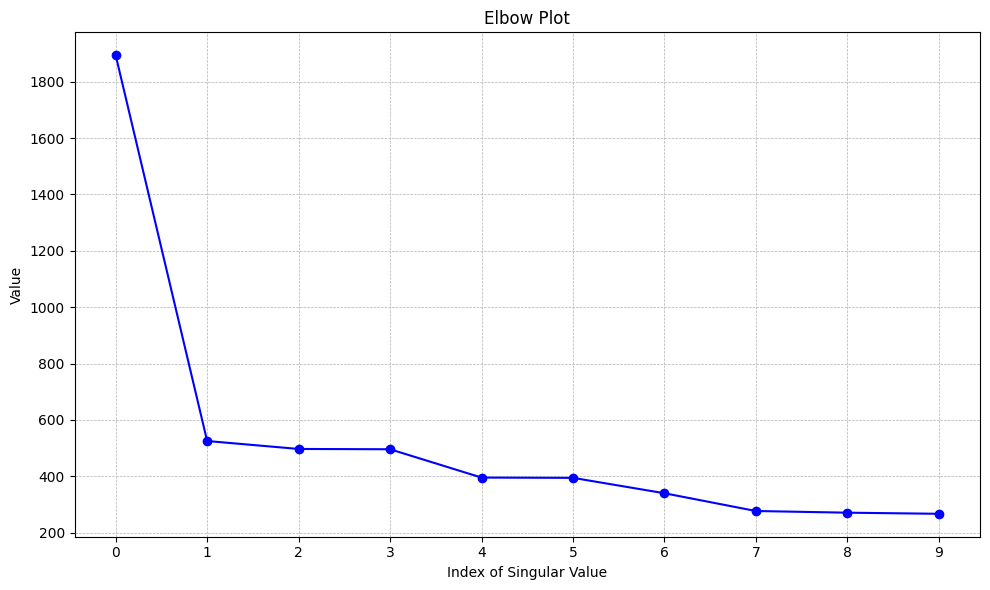

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(diagonal_entries, marker='o', linestyle='-', color='b')
plt.title('Elbow Plot')
plt.xlabel('Index of Singular Value')
plt.ylabel('Value')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(range(len(diagonal_entries)))
plt.tight_layout()
plt.show()

### Custom K-Means Function

In [ ]:
U_loaded = U_loaded[:,:5]
U_loaded.shape

(6040, 5)

In [ ]:
import numpy as np

def initialize_centroids(data, k):
    """Randomly initialize k centroids from the data points."""
    indices = np.random.permutation(data.shape[0])
    centroids = data[indices[:k]]
    return centroids

def assign_clusters(data, centroids):
    """Assign each data point to the nearest centroid."""
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def update_centroids(data, assignments, k):
    """Update centroids as the mean of all data points assigned to each cluster."""
    new_centroids = np.array([data[assignments == i].mean(axis=0) for i in range(k)])
    return new_centroids

def k_means(data, k, max_iters=100, tol=1e-4):
    """Manual implementation of the k-means algorithm."""
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        assignments = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, assignments, k)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return centroids, assignments

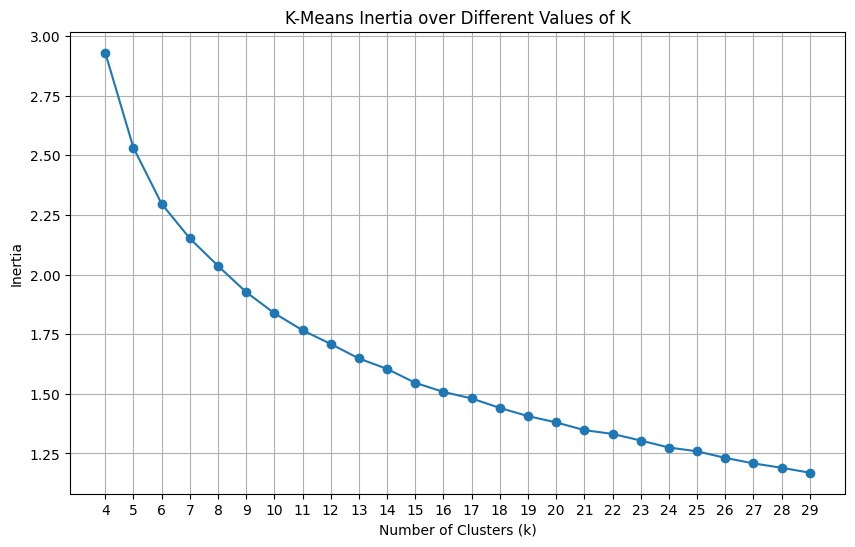

In [ ]:
import matplotlib.pyplot as plt

def calculate_inertia(data, centroids, assignments):
    """Calculate the inertia of the current clustering, defined as the sum of squared distances of samples to their closest centroid."""
    inertia = 0
    for i, centroid in enumerate(centroids):
        cluster_data = data[assignments == i]
        inertia += ((cluster_data - centroid) ** 2).sum()
    return inertia

data = U_loaded

inertias = []
k_values = range(4, 30)

for k in k_values:
    centroids, assignments = k_means(data, k)
    inertia = calculate_inertia(data, centroids, assignments)
    inertias.append(inertia)

# Plotting the inertia values over different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker='o')
plt.title('K-Means Inertia over Different Values of K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


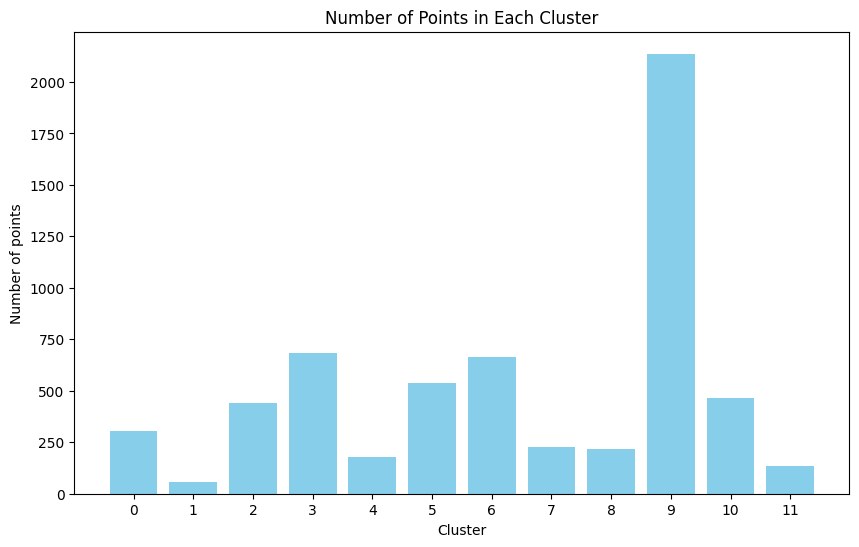

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = U_loaded
k = 12
centroids, assignments = k_means(data, k)

cluster_counts = np.bincount(assignments, minlength=k)

clusters = np.arange(k)

plt.figure(figsize=(10, 6))
plt.bar(clusters, cluster_counts, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of points')
plt.title('Number of Points in Each Cluster')
plt.xticks(clusters)
plt.show()


In [ ]:
users_data['Cluster'] = assignments
users_data.head()

,UserID,Gender,Age,Occupation,Zip-code,Occupation_Name,Cluster
0,1,F,1,10,48067,K-12 Student,6
1,2,M,56,16,70072,Self-Employed,6
2,3,M,25,15,55117,Scientist,3
3,4,M,45,7,02460,Executive/Managerial,9
4,5,M,25,20,55455,Writer,8


### Recommendation System

In [ ]:
def recommendation_system(new_user_ratings):
  new_user_data = pd.DataFrame(new_user_ratings, index=[0])
  new_user_movies = pd.DataFrame(columns=ratings.columns)
  new_user_data_merged = pd.merge(new_user_movies, new_user_data, how='outer').fillna(0)
  new_user_data_reordered = new_user_data_merged[ratings.columns]
  new_user_data_reduced = np.dot(new_user_data_reordered, Vt_loaded.T)
  new_user_data_reduced = new_user_data_reduced[0][0:5]

  # Reshape the array to be a 1x5 array
  new_user_data_reduced = new_user_data_reduced.reshape(1, 5)

  # Find the cluster of the new user
  new_user_cluster = np.argmin(np.linalg.norm(new_user_data_reduced[:, np.newaxis] - centroids, axis=2), axis=1)

  # Filter users in the same cluster
  users_same_cluster = users_data[users_data['Cluster'] == new_user_cluster[0]]

  # Get the IDs of users in the same cluster
  user_ids_same_cluster = users_same_cluster['UserID']

  # Filter ratings of users in the same cluster
  ratings_same_cluster = merged_data[merged_data['UserID'].isin(user_ids_same_cluster)]

  # Calculate the mean rating for each movie among users in the same cluster
  mean_ratings = ratings_same_cluster.groupby('Title')['Rating'].mean().sort_values(ascending=False)

  return mean_ratings

### Model accuracy metrics

In [ ]:
def split_user_ratings(new_user_ratings, split_ratio=0.1):
    # Filter non-zero ratings
    non_zero_ratings = {movie: rating for movie, rating in new_user_ratings.items() if rating != 0}

    # Convert to items and shuffle
    items = list(non_zero_ratings.items())
    np.random.shuffle(items)

    # Split into visible and hidden
    split_index = int(len(items) * split_ratio)
    visible_ratings = dict(items[:split_index])
    hidden_ratings = dict(items[split_index:])

    return visible_ratings, hidden_ratings

# Metrics functions
def one_point_accuracy(actual_rating, predicted_rating):
    return abs(actual_rating - predicted_rating) <= 1

def two_point_accuracy(actual_rating, predicted_rating):
    return abs(actual_rating - predicted_rating) <= 2

def mean_absolute_error(actual_ratings, predicted_ratings):
    squared_diffs = [(actual - predicted) ** 2 for actual, predicted in zip(actual_ratings, predicted_ratings)]
    return np.mean(squared_diffs)

sampled_users = ratings.sample(n=500, replace=False) if len(ratings) > 1000 else ratings

# Initialize variables
one_point_accuracy_values = []
two_point_accuracy_values = []
mae_values = []

for _, selected_user in sampled_users.iterrows():

    new_user_ratings = selected_user.to_dict()
    visible_ratings, hidden_ratings = split_user_ratings(new_user_ratings, split_ratio=0.5)

    mean_ratings = recommendation_system(visible_ratings)
    hits = {movie: mean_ratings.get(movie) for movie in hidden_ratings if movie in mean_ratings}

    # Calculate 1-point and 2-point accuracy
    one_point_correct = sum(one_point_accuracy(hidden_ratings[movie], predicted_rating) for movie, predicted_rating in hits.items())
    two_point_correct = sum(two_point_accuracy(hidden_ratings[movie], predicted_rating) for movie, predicted_rating in hits.items())
    one_point_accuracy_values.append(one_point_correct / len(hits))
    two_point_accuracy_values.append(two_point_correct / len(hits))

    # Calculate Mean Absolute Error (MAE)
    actual_ratings = [hidden_ratings[movie] for movie in hits]
    predicted_ratings = [mean_ratings[movie] for movie in hits]
    mae_values.append(mean_absolute_error(actual_ratings, predicted_ratings))

average_one_point_accuracy = np.mean(one_point_accuracy_values) * 100
average_two_point_accuracy = np.mean(two_point_accuracy_values) * 100
average_mae = np.mean(mae_values)

print(f"Average Accuracy within 1 point: {average_one_point_accuracy:.2f}%")
print(f"Average Accuracy within 2 points: {average_two_point_accuracy:.2f}%")
print(f"Average Mean Absolute Error (MAE): {average_mae:.2f}")


Average Accuracy within 1 point: 70.26%
Average Accuracy within 2 points: 95.49%
Average Mean Absolute Error (MAE): 0.99


### Precition for a new user

In [ ]:
sample_data = {'Johnny Mnemonic': 1,
              'Jaws 3-D': 1,
              'Batman & Robin': 1,
              'Pretty in Pink': 1,
              'Hope Floats': 1,
              'Runaway Bride': 1,
              'Tigger Movie, The': 1,
              'Happy Go Lovely': 1,
              'American Pimp': 1,
             'Kids of the Round Table': 1,
              'Suture': 1,
              "Boxing Helena": 1,
              "Robert A. Heinlein's The Puppet Masters": 1,
              'Renaissance Man': 1,
              'Outlaw, The': 1}

predicted_ratings = recommendation_system(sample_data)

sorted_predictions = predicted_ratings.sort_values(ascending=False)

top_5_movies = sorted_predictions.index.unique()[:5]

top_5_movies_df = movies_data[movies_data["Title"].isin(top_5_movies)]

print("Top 5 Movies for you:")
for movie in zip(top_5_movies):
    print(f"- {movie}")


Top 5 Movies for you:
- ('Education of Little Tree, The',)
- ('Chushingura',)
- ('Return with Honor',)
- ('Foreign Student',)
- ('Circus, The',)
